<a href="https://colab.research.google.com/github/Yahia0mohamed/ML_projects/blob/main/BayesianClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***getting the libraries***

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
import random as rand
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

***getting data and seeing it***

In [16]:
iris_df=load_iris()
print(iris_df.data,iris_df.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

***split the data frame to data and lables***

In [17]:
y=iris_df.target
x=iris_df.data

***Bulding the train validate test split***

In [18]:
def train_validate_test_split(data, labels, test_ratio=0.3, val_ratio=0.3):
    # Handling issues with the ratios
    if test_ratio + val_ratio >= 1.0:
        raise ValueError("Test and validation ratios sum to more than 1.0, making it impossible to allocate a training set.")

    # Making a copy of the data and shuffling
    total_samples = len(data)
    shuffled_indices = np.random.permutation(total_samples)
    data = data[shuffled_indices]
    labels = labels[shuffled_indices]

    # Calculate the sizes of test and validation sets
    test_size = int(total_samples * test_ratio)
    val_size = int(total_samples * val_ratio)

    # Splitting the data
    test_data, test_labels = data[:test_size], labels[:test_size]
    val_data, val_labels = data[test_size:test_size + val_size], labels[test_size:test_size + val_size]
    train_data, train_labels = data[test_size + val_size:], labels[test_size + val_size:]

    return train_data, train_labels, val_data, val_labels, test_data, test_labels

***bulding the accurecy function***

In [19]:
def calculate_accuracy(pred, test):
    total = len(test)
    correct = sum(1 for p, t in zip(pred, test) if p == t)
    accuracy = (correct / total)
    return accuracy

***using the function made by me***

In [41]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_validate_test_split(x, y, test_ratio=0.3, val_ratio=0.3)

***training and validating the model***

In [42]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [43]:
Y_val_pred = model.predict(X_val)
val_accuracy = calculate_accuracy(Y_val, Y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.8888888888888888


***test the model***

In [44]:
y_test_pred = model.predict(X_test)
test_accuracy = calculate_accuracy(Y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0


**`plotting the decision boundry`**

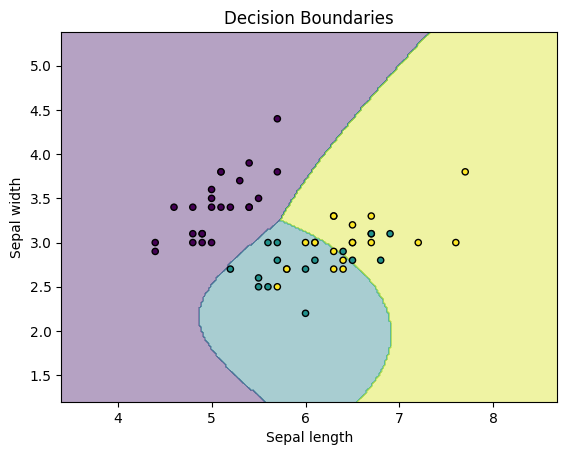

In [45]:
def plot_decision_boundary(X, y, model):
    h = .02

    # find the minimum and maximum valuse in the first and second features.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # create a meshgrid determined by the max and min points to create a 2D grid.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # train the model again over only two features to be able to draw.
    model_2d = GaussianNB()
    model_2d.fit(X, y)

    Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision Boundaries')
    plt.show()

plot_decision_boundary(X_train[:, :2], Y_train, model)